## UNTREF
## INGENIERIA DE SONIDO
## SEÑALES Y SISTEMAS 
            
                        
# PRACTICA 5:   Respuesta en Frecuencia. Filtros analógicos



Cuando trabajamos con señales de voz, debemos ser capaces de grabar, guardar y leer voces o música usando formato wav. Estas actividades se logran con librerías específicas.
Usaremos `scipy.io.wavfile` para almacenar en un archivo wav y leerlo. Usaremos `sounddevice` para grabar y reproducir.

**OBJETIVO**: En esta práctica se pretende reforzar el concepto de Respuesta en Frecuencia de una red y su efecto en la señal de salida cuando la entrada es una sinusoide. Como caso especial se estudiarán los sistemas denominados filtros como dispositivos selectivos en frecuencia.

**OBJETIVOS ESPECÍFICOS**: 
* Diseño de diversos tipos de filtros a fin de conocer las características más relevantes como la magnitud y fase de la Respuesta en Frecuencia y la respuesta impulsiva de estos sistemas.
* Alimentar los filtros con señales de diverso tipo, para comprender mejor lo que representa la selectividad de frecuencia de los filtros


### Parte 1: Adquisición de señal

Vamos a hacer un ejemplo donde grabaremos una porción de voz y luego la reproduciremos. Al principio importaremos las librerías mencionadas y otras que requeriremos para pruebas posteriores.

In [1]:
import numpy as np
from fftplot import graficar_fft
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy import signal

> Nota: Para instalar **sounddevice** deberán abrir una terminal (cmd) y ejecutar el siguiente comando: `conda install -c conda-forge python-sounddevice` 

A continuación definiremos la frecuencia de muestreo que usaremos para digitalizar la señal de audio y la duración de la grabación.

In [2]:
fs = 44100  # Tasa o frecuencia de muestreo
seconds = 3  # Duración de la grabación en segundos

Luego, procedemos a grabar y reproducir la muestra de audio.

In [3]:
mi_grabacion = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()    # Se espera hasta que se grabe  completamente
wav.write('grabacion_voz.wav', fs, mi_grabacion)    # Se guarda en format  WAV en el archivo grabo2.wav
sd.play(mi_grabacion)  # Se reproduce

El método `sd.rec` requiere tres argumentos:
 * La cantidad de muestras que vamos a grabar, que resulta de multiplicar `fs` y `seconds`
 * La frecuencia de muestreo o *sample rate*
 * La cantidad de canales de salida para la señal grabada (`channels`)

Lo que haremos a continuación es leer el archivo wav que acabamos de grabar. La instrucción `read` de `scipy.io.wavfile`, devuelve la data y la frecuencia de muestreo.

In [4]:
fs, audio_signal = wav.read('grabacion_voz.wav')    # se leen los datos y fs
t = np.linspace(0, audio_signal.size // fs, audio_signal.size)   # se genera un vector de tiempo adecuado
sd.play(audio_signal)   # se reproduce  la señal


In [5]:
audio_signal.dtype

dtype('float32')

Finalmente, generamos los gráficos. Vamos a usar la función `fftplot` para mostrar la respuesta en frecuencia de la señal.

array([0.00713753, 0.00697774, 0.00708968, ..., 0.00692489, 0.00708968,
       0.00697774], dtype=float32)

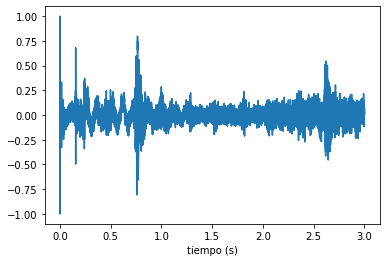

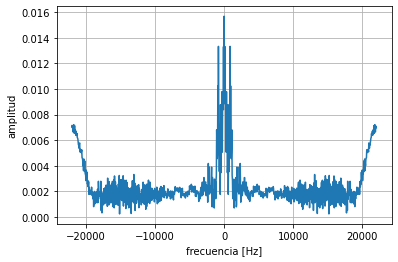

In [6]:
plt.plot(t, audio_signal)   # Se grafica la señal en tiempo
plt.xlabel('tiempo (s)')
graficar_fft(audio_signal, fs, 1024)   # Se grafica la magnitud de la fft

Podemos pasar el argumento `log=True` para genrar un gráfico logarítmico.

array([0.00713753, 0.00697774, 0.00708968, ..., 0.00692489, 0.00708968,
       0.00697774], dtype=float32)

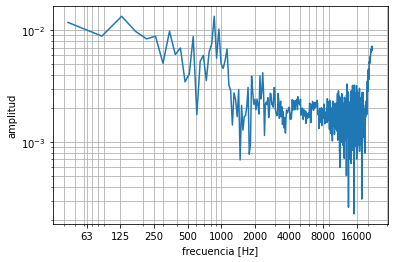

In [7]:
graficar_fft(audio_signal, fs, 1024, log=True)   # Se grafica la magnitud de la fft

La función `fftplot` funciona con los siguientes argumentos:

* x: es la señal a la que se le desea hallar la FFT

* fs: es la frecuencia de muestreo de la senal original

* objeto_ax (opcional): es una instancia de un contenedor gráfico para poder
graficar subplots.

* N (opcional): es el numero de puntos de la fft, debe ser una potencia de 2,
de no ser asi, el algoritmo corrige tal que N es la proxima 
potencia de 2 mas cercana al N proporcionado por el usuario

* title (opcional): texto para incluir como titulo del gráfico

* log (opcional): recibe un valor booleano, por defecto toma un valor False y el gráfico generado es lineal, usando True como valor el argumento se puede hacer un gráfico logarítmico.

En el caso anterior sólo usamos 3 argumentos: `x`, `fs` y `N`. Los primeros 2 son obligatorios y el tercero es opcional. EL valor de `N`, que es la cantidad de muestras de la FFT será convertido a una potencia de 2 dentro de la función, si sucede que se pasa un número que no cumple con esa condición. Si observa el archivo **fftplot.py**, verá que tiene una función `proxima_potencia_de_2(numero)` que transforma un número a la potencia de 2 más cercana de mayor valor. Esta función es invocada dentro de `graficar_fft` para transformar el `N` que se recibe como argumento. 

Se pueden usar los otros dos argumentos opcionales de la función `graficar_fft` para personalizar las gráficas. El argumento `objeto_ax` recibe un objeto `axes` sobre el cual vamos a graficar, en caso de que estemos usando subplots. Cada vez que graficamos estamos creando un objeto `axes`, que es un contenedor del gráfico que vamos a realizar. Cuando usamos subplots podemos generar varios plots y referenciarlos como `ax1`, `ax2`, ... De esta manera es posible hacer uso de la función `graficar_fft` mpdificada que recibe como argumento extra el objeto `axes` sobre el que queremos graficar.

El último argumento, `title`, sirve para añadir un texto como título del gráfico.

In [8]:
# para cambiar el tamaño de la figura
plt.rcParams["figure.figsize"] = (20,10)

array([0.00713753, 0.00697774, 0.00708968, ..., 0.00692489, 0.00708968,
       0.00697774], dtype=float32)

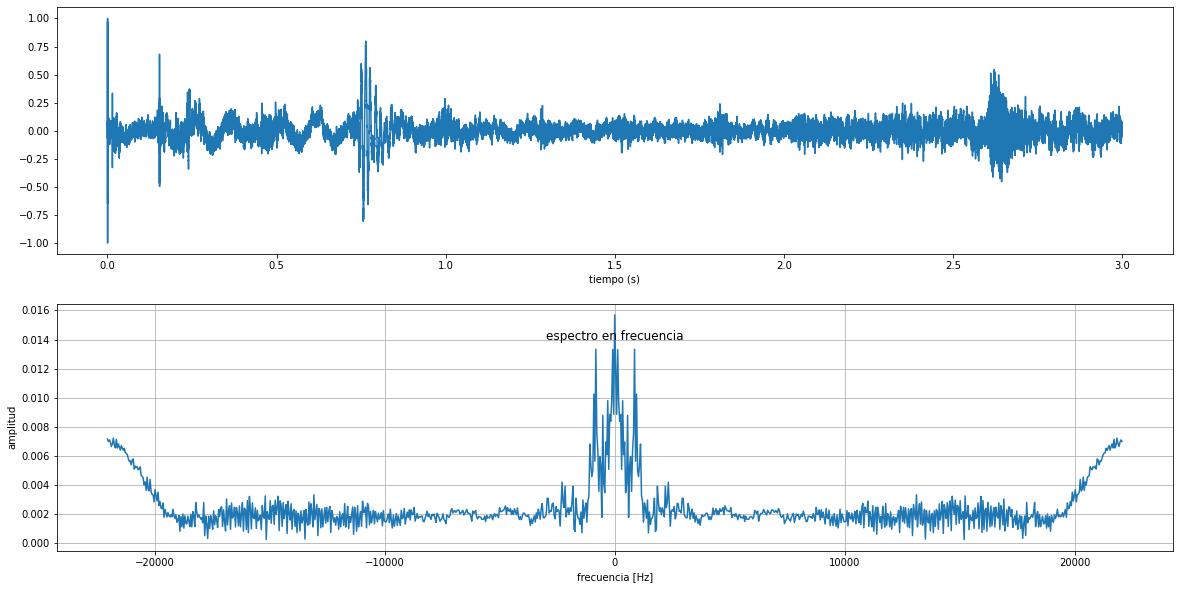

In [9]:
# Crear dos objetos (ax1 y ax2) que contendrán a cada uno de los gráficos
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t, audio_signal)   # Se grafica la señal en tiempo
ax1.set_xlabel('tiempo (s)')

# ax2 se pasa como argumento a graficar_fft para que coloque el dibujo ahí
graficar_fft(audio_signal, fs, N=1024, objeto_ax=ax2, title='espectro en frecuencia')   # Se grafica la magnitud de la fft

### Parte 2: Diseño de filtros

El siguiente script genera un filtro de acuerdo a las características que especifica el usuario. Al ejecutarlo se solicitará el ingreso de la tipología de filtro, su tipo, y frecuencias de corte.

Una vez pasados los parámetros para generar el filtro, se utiliza una estructura llamada diccionario para asociar la opción que el usuario elige con el filtro que le corresonde. Los coeficienes del filtro se guardan en las variables $ b $ (numerador) y $ a $ (denominador). Ejecutar la siguiente línea:

```.py
b, a = filtros[filt]
```
Va a calcular lo siguiente:

* Coeficientes del filtro Butterworth: si `tipo_filtro = 1`
* Coeficientes del filtro Chebyshev I: si `tipo_filtro = 2`
* Coeficientes del filtro Chebyshev II: si `tipo_filtro = 3`
* Coeficientes del filtro Elíptico: si `tipo_filtro = 4`

In [1]:
#FILTROS
print('FILTRO         | VALOR A INGRESAR')
print('Butterworth    | 1')
print('Chevishev 1    | 2')
print('Chevishev 2    | 3')
print('Elíptico       | 4')
tipo_filtro = int(input('¿Qué filtro desea generar? '))

orden = int(input('Ingrese el órden del filtro '))

print('TIPOS DE FILTRO ')
print('lowpass    | L')
print('highpass   | H')
print('bandpass   | BP')
print('bandstop   | BS')
tipo = input('Ingrese el tipo del filtro de acuerdo a como están escritos en la lista ')

if tipo == "L" or tipo == "H":
    fc = int(input('Ingrese frecuencia de corte '))
    wc = fc / (0.5*fs)
elif tipo == "BP" or tipo == "BS":
    a = int(input('Ingrese el primer corte '))
    b = int(input('Ingrese el segundo corte '))
    wc = ([a / (0.5*fs), b / (0.5*fs)])
else:
    print('error en el tipo de filtro')
    
filtros = {
            1 : signal.butter(N=orden, Wn=wc, btype=tipo),
            2 : signal.cheby1(N=orden, rp=2, Wn=wc, btype=tipo),
            3 : signal.cheby2(N=orden, rs=20, Wn=wc, btype=tipo),
            4 : signal.ellip(N=orden, rp=2, rs=20, Wn=wc, btype=tipo)
          }

b, a = filtros[tipo_filtro]  # coeficientes del filtro                           
w, h = signal.freqz(b,a)  # respuesta en frecuencia-> w1: vector de frecuencias, h1: H(jw)

respuesta_fase = np.unwrap(np.angle(h)) 

FILTRO         | VALOR A INGRESAR
Butterworth    | 1
Chevishev 1    | 2
Chevishev 2    | 3
Elíptico       | 4


¿Qué filtro desea generar?  2
Ingrese el órden del filtro  4


TIPOS DE FILTRO 
lowpass    | L
highpass   | H
bandpass   | BP
bandstop   | BS


Ingrese el tipo del filtro de acuerdo a como están escritos en la lista  H
Ingrese frecuencia de corte  600


NameError: name 'fs' is not defined

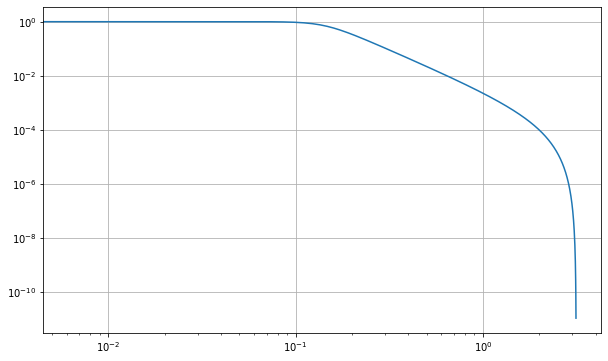

In [12]:
# para cambiar el tamaño de la figura
plt.rcParams["figure.figsize"] = (10,6)
plt.loglog(w, np.abs(h))
plt.grid()

Como el rango de frecuencias del filtro digital está definido entre 0 y $\pi$, reescalamos estos valores multiplicándolos por $fs/(2 \cdot \pi)$. 

In [13]:
a = fs/(2*np.pi)

In [14]:
w1 = a*w

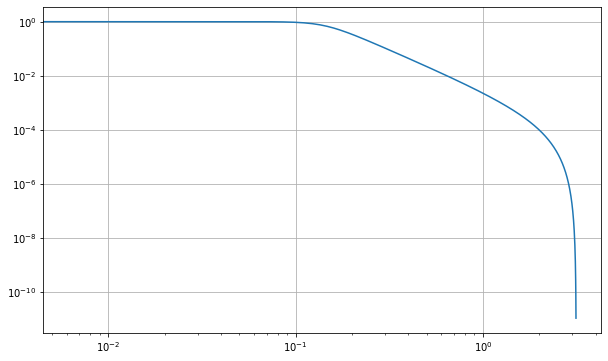

In [15]:
plt.loglog(w, np.abs(h))
plt.grid()

## Implementación de filtros

**Pruebe diferentes filtros para ver su respuesta** y aplíquelos sobre la señal grabada utilizando la función `lfilter`. Cuenta con el apunte 'Teoría_Filtros.pdf' para consultar sobre esta parte.